# Лабораторна робота 2
##### Виконала *Ваховська Віра Миколаївна*

##### Мета:
Навчитися використовувати дані з OpenStreetMap для побудови картографічних
відображень, а також для аналізу маршрутів між двома точками.

##### Обладнання та програмне забезпечення:
1. Комп'ютер з доступом до інтернету
2. Встановлений Python
3. Встановлені бібліотеки: **osmnx, networkx, matplotlib, geopandas, shapely**

### Кроки виконання:
1. Завантажити карту довільного міста з OpenStreetMap.
2. Відобразити вулиці та будинки на карті.
3. Вибрати довільні два будинки.
4. Побудувати та зобразити на карті найкоротшу відстань між цими двома
будинками.
5. Відобразити цей маршрут на фоновій географічній карті.
6. Розрахувати та зобразити альтернативні маршрути

### Теоретичні відомості та знайдені корисні матеріали

1. [OSMnx Documentation](https://osmnx.readthedocs.io/en/stable/user-reference.html)  
2. [OpenStreetMap](https://www.openstreetmap.org/#map=6/48.54/31.17)  
3. [Folium Documentation](https://python-visualization.github.io/folium/latest/user_guide/map.html)  
4. [Visualizing Routes on Interactive Maps](https://towardsdatascience.com/visualizing-routes-on-interactive-maps-with-python-part-1-44f8d25d0761)  
5. [Optimal Route Using Dijkstra Algorithm](https://thomasafink.medium.com/plotting-the-optimal-route-for-data-scientists-in-python-using-the-dijkstra-algorithm-14e3e9383a0a)  
6. [OpenStreetMap Data in Python](https://darribas.org/gds4ae/content/notebooks/06-OpenStreetMap.html)  
7. [Network Route Visualization](https://spatial-dev.guru/2024/01/14/network-route-visualization-using-pyvista-and-osmnx/)  
8. [Nominatim for Location Search](https://nominatim.openstreetmap.org/ui/search.html?q=Khmelnytskyi%2C+Ukraine)  

# Хід роботи

In [1]:
# Встановлення необхідних бібліотек
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
import folium
import random

#### 1. Завантаження даних для міста Хмельницький

In [2]:
# Завантаження карти міста
city_name = "Khmelnytskyi, Ukraine"
G = ox.graph_from_place(city_name, network_type="drive")

# Завантаження будівель у межах міста
gdf_buildings = ox.features_from_place(city_name, tags={"building": True})
print("Дані успішно завантажено!")

Дані успішно завантажено!


#### 2. Візуалізація вуличної мережі та будівель

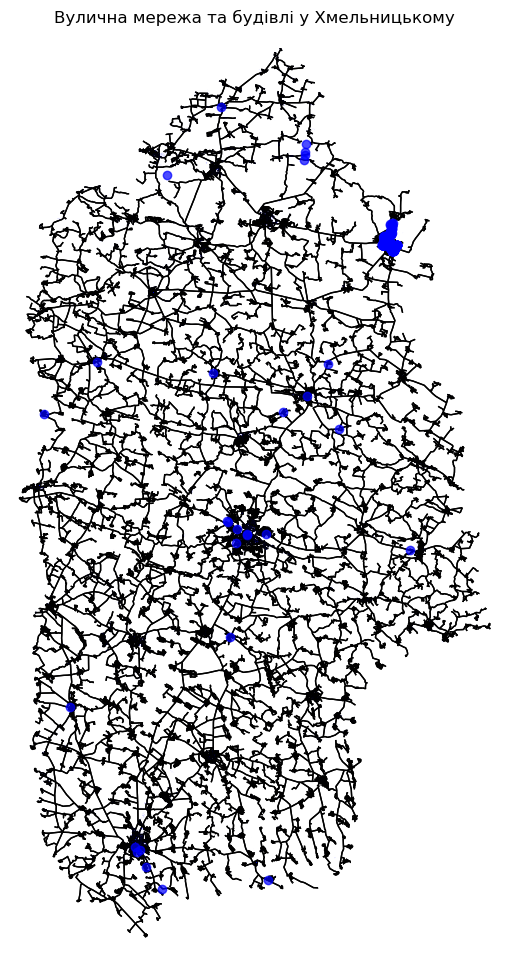

In [3]:
fig, ax = plt.subplots(figsize=(12, 12))
ax.set_title("Вулична мережа та будівлі у Хмельницькому")

# Відображення вуличної мережі
ox.plot_graph(G, ax=ax, node_size=0, edge_color="black", edge_linewidth=1, show=False)

# Відображення будівель
gdf_buildings.plot(ax=ax, color="blue", alpha=0.7)
plt.show()

#### 3. Вибір двух випадкових будівель

In [4]:
# Координати будівель у форматі широта/довгота
building_coords = gdf_buildings.to_crs(epsg=3857).centroid.to_crs(epsg=4326)
start_building = building_coords.iloc[random.randint(0, len(building_coords) - 1)]
end_building = building_coords.iloc[random.randint(0, len(building_coords) - 1)]

# Виведення координат вибраних будівель
print(f"Координати першого будинку: {start_building}")
print(f"Координати другого будинку: {end_building}")

Координати першого будинку: POINT (26.59192935000043 48.73735625000975)
Координати другого будинку: POINT (26.228050914390835 48.80856893164578)


#### 4. Побудова найкоротшого маршруту між вибраними будівлями

In [5]:
# Визначення найближчих вузлів у графі
start_node = ox.distance.nearest_nodes(G, start_building.x, start_building.y)
end_node = ox.distance.nearest_nodes(G, end_building.x, end_building.y)

# Розрахунок найкоротшого маршруту
shortest_path = nx.shortest_path(G, source=start_node, target=end_node, weight="length")
print(f"Найкоротший маршрут: {shortest_path}")

Найкоротший маршрут: [2783070444, 2783070437, 2783070391, 2783070321, 2783070316, 562651265, 562651269, 1268848298, 562651277, 1110766574, 6470962156, 6470962157, 1399977356, 2040297061, 483374204, 483374207, 2327896863, 2669715632, 8099574257, 10042816806, 2669715595, 8097333323, 10042853120, 2327896904, 3440522549, 10042853142, 10042853145, 10042816795, 2327896885, 2327896956, 2327896958, 2681127010, 2681127189, 2681127453, 271021848, 2671530148, 2672752456, 2672752494, 2671530598, 2671484135, 2672752720, 2671853437, 2671846915, 2022610766, 2739606281, 2327897079, 2671848388, 2671853485, 2671846938, 271021827, 2671853486, 2671849566, 2671846957, 1658036682, 1658036681, 1658036700, 2474093637, 2474092502, 2474093318, 2474091309, 7071678299]


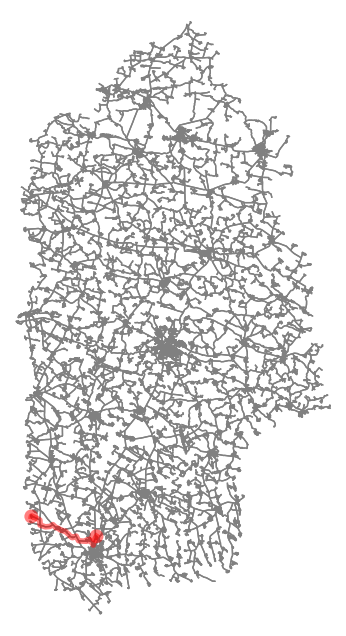

In [6]:
# Візуалізація маршруту на графі
fig, ax = ox.plot_graph_route(
    G, shortest_path, route_linewidth=4, node_size=0, bgcolor="white", edge_color="gray"
)

#### 5. Відображення маршруту на інтерактивній карті Folium

In [7]:
start_coords = (G.nodes[start_node]['y'], G.nodes[start_node]['x'])
end_coords = (G.nodes[end_node]['y'], G.nodes[end_node]['x'])

# Створення базової карти
route_map = folium.Map(location=start_coords, zoom_start=14)

# Додавання основного (найкоротшого) маршруту на карту
route_coords = [(G.nodes[node]['y'], G.nodes[node]['x']) for node in shortest_path]
folium.PolyLine(route_coords, color="blue", weight=5, opacity=0.8, 
                popup=f"Довжина: {nx.shortest_path_length(G, start_node, end_node, weight='length'):.2f} м").add_to(route_map)

# Додавання маркерів для початкової та кінцевої точок
folium.Marker(location=start_coords, popup="Початок маршруту", icon=folium.Icon(color="green")).add_to(route_map)
folium.Marker(location=end_coords, popup="Кінець маршруту", icon=folium.Icon(color="red")).add_to(route_map)

# Збереження карти
route_map.save("khmelnytskyi_route.html")
route_map

#### 6. Побудова альтернативних маршрутів

In [8]:
def find_alternative_routes(G, source, target, weight="length", num_routes=3, skip_path=None):
    routes = []
    temp_G = G.copy()

    for _ in range(num_routes):
        try:
            # Знаходження найкоротшого маршруту
            path = nx.shortest_path(temp_G, source=source, target=target, weight=weight)
            
            # Пропустити маршрут, якщо він збігається зі skip_path
            if path == skip_path:
                for u, v in zip(path[:-1], path[1:]):
                    temp_G[u][v][0][weight] *= 10
                continue
            
            routes.append(path)

            # Модифікація ваг для унікалізації маршрутів
            for u, v in zip(path[:-1], path[1:]):
                temp_G[u][v][0][weight] *= 10
        except nx.NetworkXNoPath:
            print("Неможливо знайти більше маршрутів.")
            break

    return routes

# Розрахунок альтернативних маршрутів, пропускаючи найкоротший
routes = find_alternative_routes(G, start_node, end_node, weight="length", num_routes=3, skip_path=shortest_path)

# Додавання тільки альтернативних маршрутів на існуючу карту
colors = ["green", "orange", "purple"]
for i, route in enumerate(routes):
    route_coords = [(G.nodes[node]['y'], G.nodes[node]['x']) for node in route]
    folium.PolyLine(
        route_coords, 
        color=colors[i % len(colors)], 
        weight=5, 
        opacity=0.8, 
        popup=f"Маршрут {i+1}: Довжина {nx.path_weight(G, route, weight='length'):.2f} м"
    ).add_to(route_map)

# Показ оновленої карти
route_map

#### Висновок:

Протягом цієї лабораторної роботи було продемонстровано використання даних з OpenStreetMap для створення картографічних відображень та аналізу маршрутів між двома точками. За допомогою бібліотеки OSMnx була завантажена карта міста Хмельницький, після чого на карті були відображені вулиці та будівлі, використовуючи функцію ox.plot_graph() для побудови вуличної мережі та gdf_buildings.plot() для відображення будівель. Для вибору двох випадкових будівель застосовувався метод centroid, що дозволив отримати координати для подальшого використання в побудові маршруту.

Основним етапом роботи стало побудова найкоротшого маршруту між вибраними будівлями, що було досягнуто за допомогою функції nx.shortest_path() з бібліотеки Networkx. Цей маршрут було візуалізовано на графі за допомогою ox.plot_graph_route() та на інтерактивній карті Folium, використовуючи folium.PolyLine для малювання ліній маршруту і маркери для позначення початкової та кінцевої точок.

Також було реалізовано побудову альтернативних маршрутів. Для цього була розроблена функція find_alternative_routes(), що дозволяє знайти кілька варіантів маршруту, уникаючи маршрути, які збігаються з найкоротшим. Кожен альтернативний маршрут також був відображений на інтерактивній карті.

Результати роботи показали, як можна ефективно використовувати бібліотеки Python для аналізу маршрутів у реальних міських мережах, а також для створення зручних інтерфейсів для користувачів за допомогою інтерактивних карт. Це дозволяє не тільки планувати маршрути, але й аналізувати альтернативні варіанти, що може бути корисно в різних сферах, таких як планування транспортної інфраструктури або пошук оптимальних шляхів пересування.